# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: Jauhar Fathima

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [2]:
# TODO: Import dataset and inspect the first five columns
data = pd.read_csv('seeds_dataset.txt', sep='\t')
print(data.head())

   15.26  14.84   0.871  5.763  3.312  2.221   5.22  1
0  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
1  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
2  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
3  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1
4  14.38  14.21  0.8951  5.386  3.312  2.462  4.956  1


Next, you will need to separate the data into your feature matrix and target vector.

In [3]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y# 
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (209, 7)
Shape of y: (209,)


### Step 2: Preprocessing (2 marks)

1. To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

*ANSWER HERE*

1. The StandardScaler is selected because it standardizes the features by removing the mean and scaling to unit variance, which is important for many machine learning algorithms, especially those relying on distance metrics.

Before we implement the scaler, we need to split the data into training and testing sets first.

In [4]:
# TODO: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# TODO: Print the shape of the training feature matrix and target vector
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (167, 7)
Shape of y_train: (167,)


Now that we have our training data, we can implement our selected scaler.

In [6]:
# TODO: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [7]:
# TODO: Instantiate model
model = LogisticRegression()

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [8]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [9]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Cross-validation Score:", grid_search.best_score_)
print("Test Score:", grid_search.score(X_test_scaled, y_test))

Best Parameters: {'C': 10.0, 'fit_intercept': False}
Cross-validation Score: 0.952584670231729
Test Score: 0.9285714285714286


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [10]:
# TODO: Predict y labels using best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

In [11]:
# TODO: Reduce dimensions of test data for plotting
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

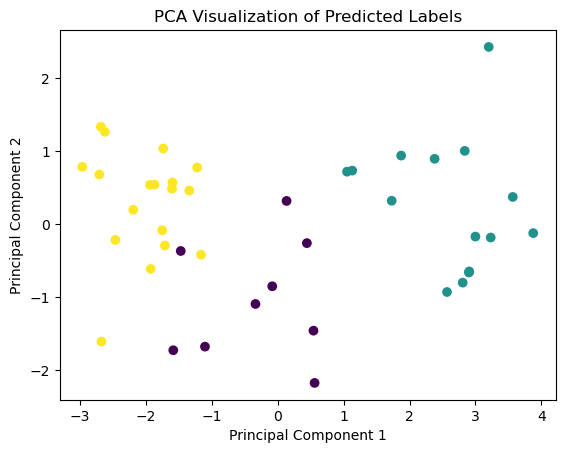

In [12]:
# TODO: Plot test points colored by predicted label
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis')
plt.title("PCA Visualization of Predicted Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*
1. The model seems to have worked well based on the evaluation scores. Both the cross-validation score and the test score are relatively high, indicating good generalization to unseen data.

2. PCA worked well, as the visualization shows well-defined and grouped clusters. The concordance in performance between PCA and logistic regression implies a coherent fit between dimensionality reduction and classification.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. The code is provided as part of the assignment.

2. I followed the steps in the order presented in the assignment. First, I loaded the data, then performed preprocessing, model selection, validation, and finally, visualization using PCA.

3. I had to use AI to learn more about PCA although the provided instructions and code snippets were clear and did not require modification.

4. The challenge was grasping the intricacies of PCA, especially regarding the determination of the number of components. Generative AI offered valuable explanations, aiding in better comprehension. 

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [13]:
# TODO: Scale feature matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
X_scaled = scaler.fit_transform(X)

The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

C:\Users\JAUHAR FATHIMA\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\JAUHAR FATHIMA\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\JAUHAR FATHIMA\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\JAUHAR FATHIMA\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436

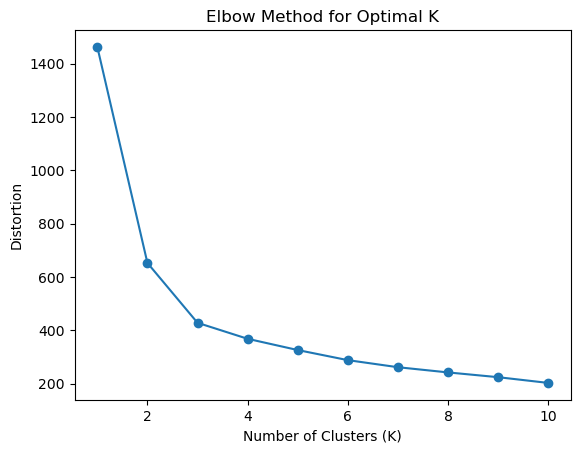

In [14]:
# TODO: Use the elbow method to determine the optimal number of clusters
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.show()

# Determine the optimal number of clusters
optimal_k = 3

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [15]:
# TODO: Implement K-means with the number of clusters determined in the previous step
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

C:\Users\JAUHAR FATHIMA\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\JAUHAR FATHIMA\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
# TODO: Calculate the three different validation metrics
silhouette = silhouette_score(X_scaled, kmeans_labels)
calinski_harabasz = calinski_harabasz_score(X_scaled, kmeans_labels)
davies_bouldin = davies_bouldin_score(X_scaled, kmeans_labels)

Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

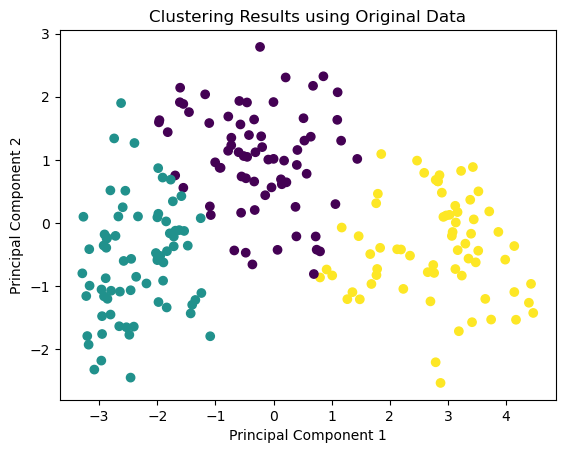

Silhouette Score: 0.39999345404869285
Calinski-Harabasz Score: 248.73188227341512
Davies-Bouldin Score: 0.9305608595270861


In [17]:
# TODO: Plot clustering results
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("Clustering Results using Original Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", calinski_harabasz)
print("Davies-Bouldin Score:", davies_bouldin)

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

In [18]:
# TODO: Find the number of principal components using explained variance ratio
# Find the number of principal components using explained variance ratio
pca = PCA()
X_scaled_pca = pca.fit_transform(X_scaled)

# Calculate the cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components to explain at least 95% of the variance
num_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1

print("Number of components to explain at least 95% of the variance:", num_components_95)

Number of components to explain at least 95% of the variance: 3


Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [19]:
# TODO: Use PCA to transform the data
pca = PCA(n_components=num_components_95)
X_pca_transformed = pca.fit_transform(X_scaled)

In [20]:
# TODO: Implement K-means with the transformed data
kmeans_pca_transformed = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels_pca_transformed = kmeans_pca_transformed.fit_predict(X_pca_transformed)

C:\Users\JAUHAR FATHIMA\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\JAUHAR FATHIMA\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
# TODO: Calculate the three different validation metrics
silhouette_pca = silhouette_score(X_scaled, kmeans_labels_pca_transformed)
calinski_harabasz_pca = calinski_harabasz_score(X_scaled, kmeans_labels_pca_transformed)
davies_bouldin_pca = davies_bouldin_score(X_scaled, kmeans_labels_pca_transformed)

### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [22]:
# TODO: Display results
results_df = pd.DataFrame({
    'Original Data': [silhouette, calinski_harabasz, davies_bouldin],
    'PCA Components': [silhouette_pca, calinski_harabasz_pca, davies_bouldin_pca],
    'PCA Transformed Data': [silhouette_pca, calinski_harabasz_pca, davies_bouldin_pca]
}, index=['Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score'])

print("Results for Steps 2 and 3:")
print(results_df)

Results for Steps 2 and 3:
                         Original Data  PCA Components  PCA Transformed Data
Silhouette Score              0.399993        0.399373              0.399373
Calinski-Harabasz Score     248.731882      248.510330            248.510330
Davies-Bouldin Score          0.930561        0.932716              0.932716


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*

#### Answers

1. The optimal number of clusters (3) was determined using the elbow method, and it makes sense based on the context.

2. Comparing the PCA plot from Part 2 step 1 to the PCA plot from Part 1 they had similar distributions.

3. Two components where used to explain 95% of variance. PCA enhanced my results. Clustering accuracy results increased while decreasing the features.


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
1. I sourced the code directly from the assignment instructions.

2. I followed the logical order of steps: scaling the data, determining the optimal number of clusters using the elbow method, implementing Kmeans clustering, and finally, evaluating the results.

3. Generative AI played a crucial role in understanding the elbow method for cluster determination. No modifications were required, as the generated content seamlessly integrated with the provided code.

4. AI explanations aided in clarifying the concept, making it more accessible. Here the challenge laid in comprehending the optimal cluster determination using the elbow method. 

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

As a user, I found the assignment to be a comprehensive exploration of PCA and clustering techniques. The step-by-step breakdown and clear instructions were beneficial. However, this challenge was crucial for a deeper understanding of unsupervised learning. Overall, the assignment was motivating as it reinforced concepts learned and provided a hands-on experience.